In [1]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
from library.experiments import *
%matplotlib notebook
SEED = 1231

In [2]:
# 1 optimiser
np.random.seed(34)

inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 10,
    'beta': 0.1, 
    'max_iter': 100,
    'tol': 1e-2,              
    'verbose': False,
    'record': True
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es()
optParas ={'x0': np.array([[140.743], [152.21]]),
           'std': np.ones((2,)) * 30, 
           'tol': 1e-3, 
           'adjust_func': inner_opt, 
           'record': True, 
           'verbose': True}
opt.set_parameters(optParas)

# 2 objective function
obj = ackley()

# init one experiment
exp = single_experiment()

# One experiment: setup objective function and optimiser
exp.set_objective(obj)
exp.set_optimizer(opt)
stats = exp.do()



*******starting optimisation from intitial mean:  [140.743 152.21 ]
eigenvalue of variance = [13.39551209 16.67930076]
total iterations = 24, total evaluatios = 3095
found minimum position = [ 1.48619337e-06 -2.01349147e-06], found minimum = 7.078538690752367e-06
Result:  global minimum
found minimum: 7.078538690752367e-06, minimum position: [ 1.48619337e-06 -2.01349147e-06], evals: 3095


<IPython.core.display.Javascript object>


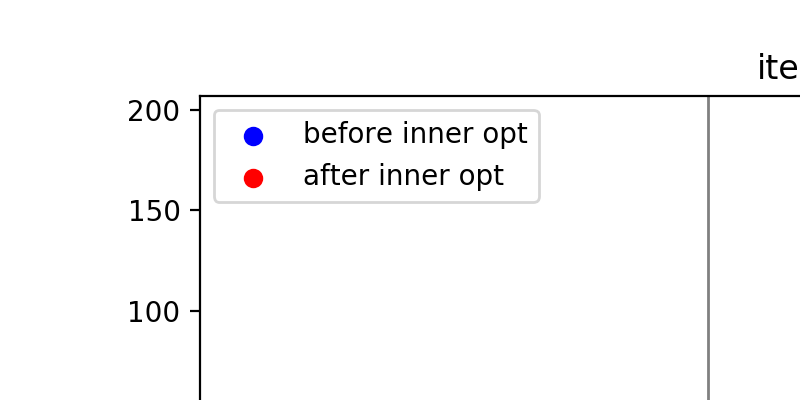

In [4]:
def draw_ellipse(ax, mean, std):
    eigVal_sqrt = np.linalg.norm(std, ord=2, axis=(0))
    eigVec = std / eigVal_sqrt
    width, height = 2 * 3 * eigVal_sqrt
    angle = np.arctan2(eigVec[0,1], eigVec[0,0]) * 180 / np.pi
    e1 = patches.Ellipse(mean, width, height,
                         angle=-angle, linewidth=2, fill=False, zorder=2)
    ax.add_patch(e1)
    ax.scatter(mean[0], mean[1], c='black', s=15)
    
def setup_scatter(ax, i):
    '''
    set up the plot of CMA-ES candidates at i-th iteration
    '''
    # draw x-axis and y-axis
    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)
    # draw candidates on scatter plot
    min_x = np.min(stats['arg'][:,:,0])
    min_y = np.min(stats['arg'][:,:,1])
    max_x = np.max(stats['arg'][:,:,0])
    max_y = np.max(stats['arg'][:,:,1])
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_x, max_y)
    for j in range(6):
        norm = stats['inner'][i][j]['arg'].shape[0]
        ax.scatter(stats['inner'][i][j]['arg'][:,0], stats['inner'][i][j]['arg'][:,1], c=np.arange(norm)/norm, vmin=0, vmax=1)
    ax.scatter(stats['x_adjust'][i,0,:], stats['x_adjust'][i,1,:], c="blue", label="before inner opt")
    ax.scatter(stats['x_adjust'][i,2,:], stats['x_adjust'][i,3,:], c="red", label="after inner opt")
    ax.legend(loc="upper left")
    draw_ellipse(ax, stats['mean'][i], stats['std'][i])
    
def animate(i):
    plt.clf()
    ax = fig.add_subplot(1, 1, 1)    
    #ax = obj.visualise2d(200, 200)
    ax.set_title('iter=%d' % (i+1))
    setup_scatter(ax, i+1)
fig = plt.figure(figsize=(8,4))
ani = animation.FuncAnimation(fig, animate, frames=stats['arg'].shape[0]-1, repeat=False, interval=500)

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=8, metadata=dict(artist='Huajian'), bitrate=600)

ani.save('../im.mp4', writer=writer)

<IPython.core.display.Javascript object>


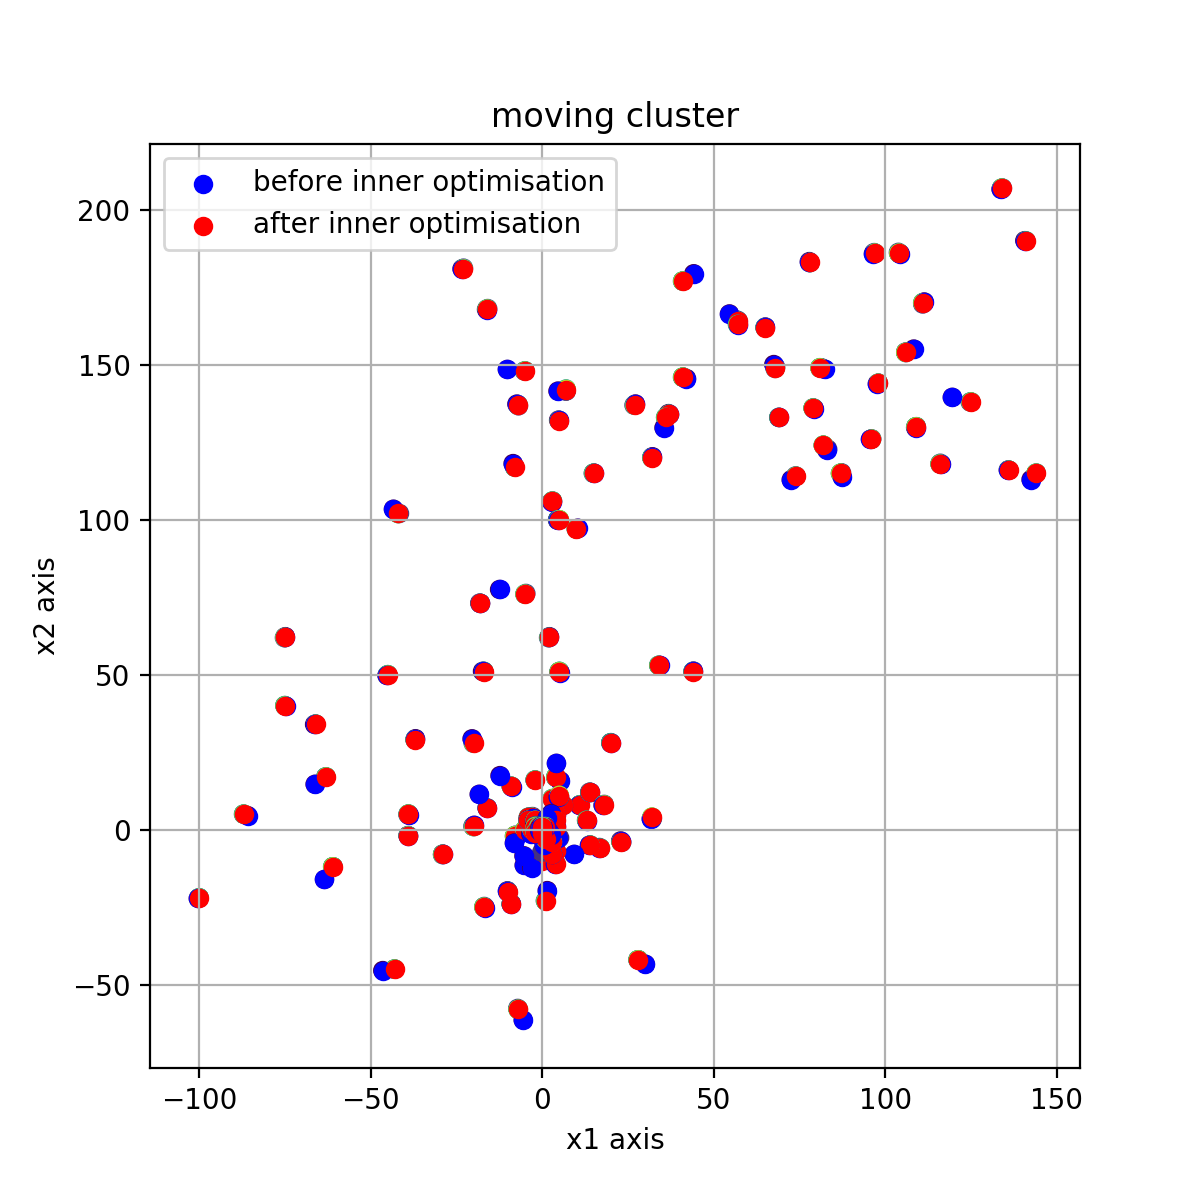

Text(0.5, 1.0, 'moving cluster')

In [22]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111);
plt.grid(True)
for i in range(stats['val'].shape[0]):
    if i == 0:
        continue
    #print(stats['x_adjust'][i,2,:])
    #print(stats['x_adjust'][i,3,:])
    for j in range(6):
        norm = stats['inner'][i][j]['arg'].shape[0]
        #print(norm, stats['inner'][i][j]['arg'][:,0])
        ax.scatter(stats['inner'][i][j]['arg'][:,0], stats['inner'][i][j]['arg'][:,1], c=np.arange(norm)/norm, vmin=0, vmax=1)
    ax.scatter(stats['x_adjust'][i,0,:], stats['x_adjust'][i,1,:], c="blue", label="before inner optimisation")
    ax.scatter(stats['x_adjust'][i,2,:], stats['x_adjust'][i,3,:], c="red", label="after inner optimisation")
    if(i == 1):
        plt.legend()
    #draw_ellipse(ax, stats['mean'][i], stats['std'][i])
plt.xlabel("x1 axis")
plt.ylabel("x2 axis")
plt.title("moving cluster")

In [26]:
ana = post_analysis_single(stats)

In [27]:
#stats['inner'][10]

<IPython.core.display.Javascript object>


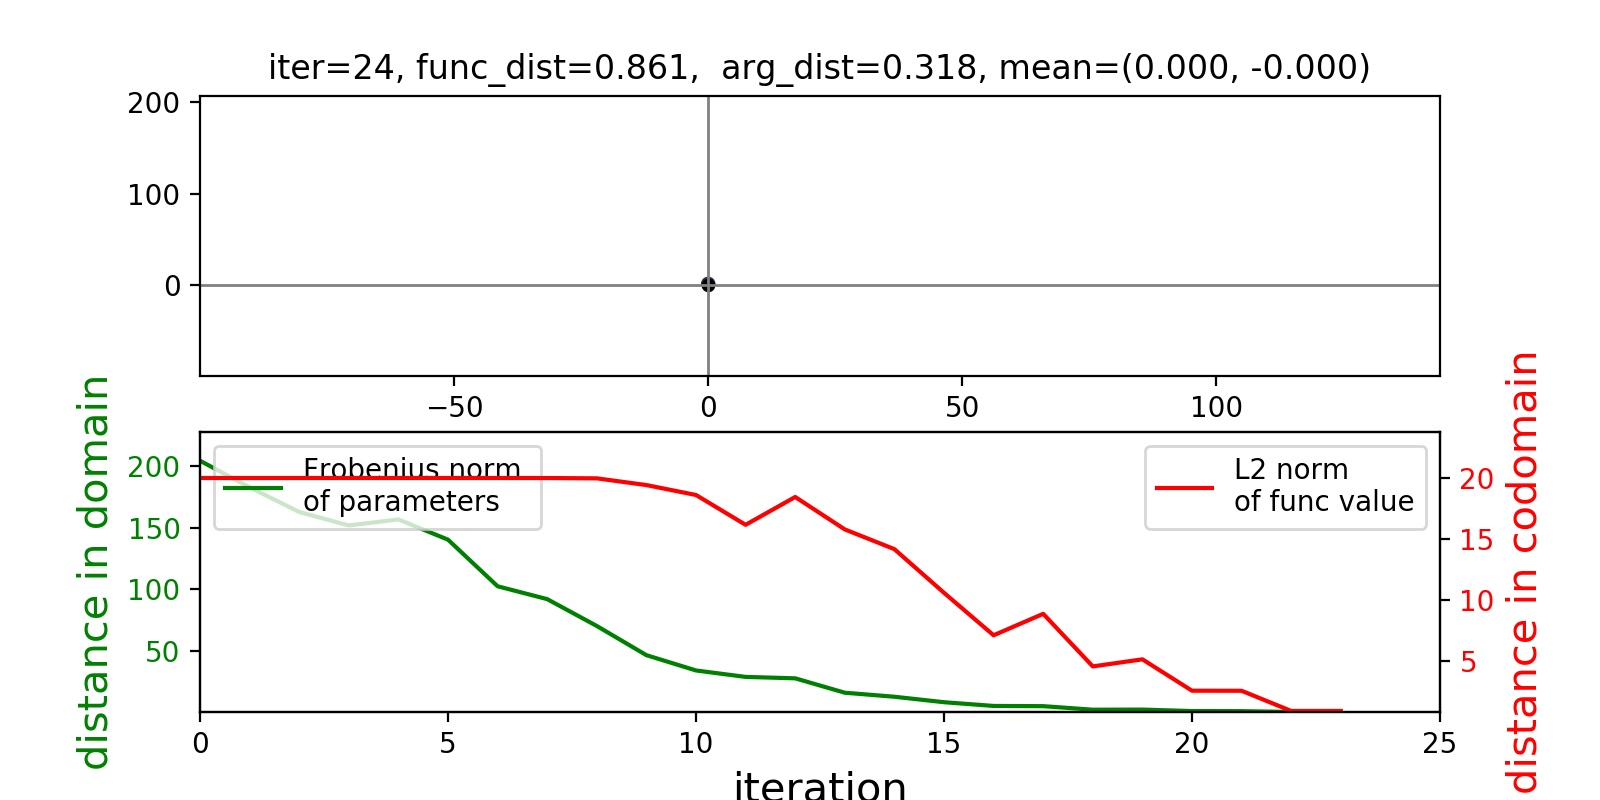

In [28]:
ana.animate_scatterplot_distance()

<IPython.core.display.Javascript object>


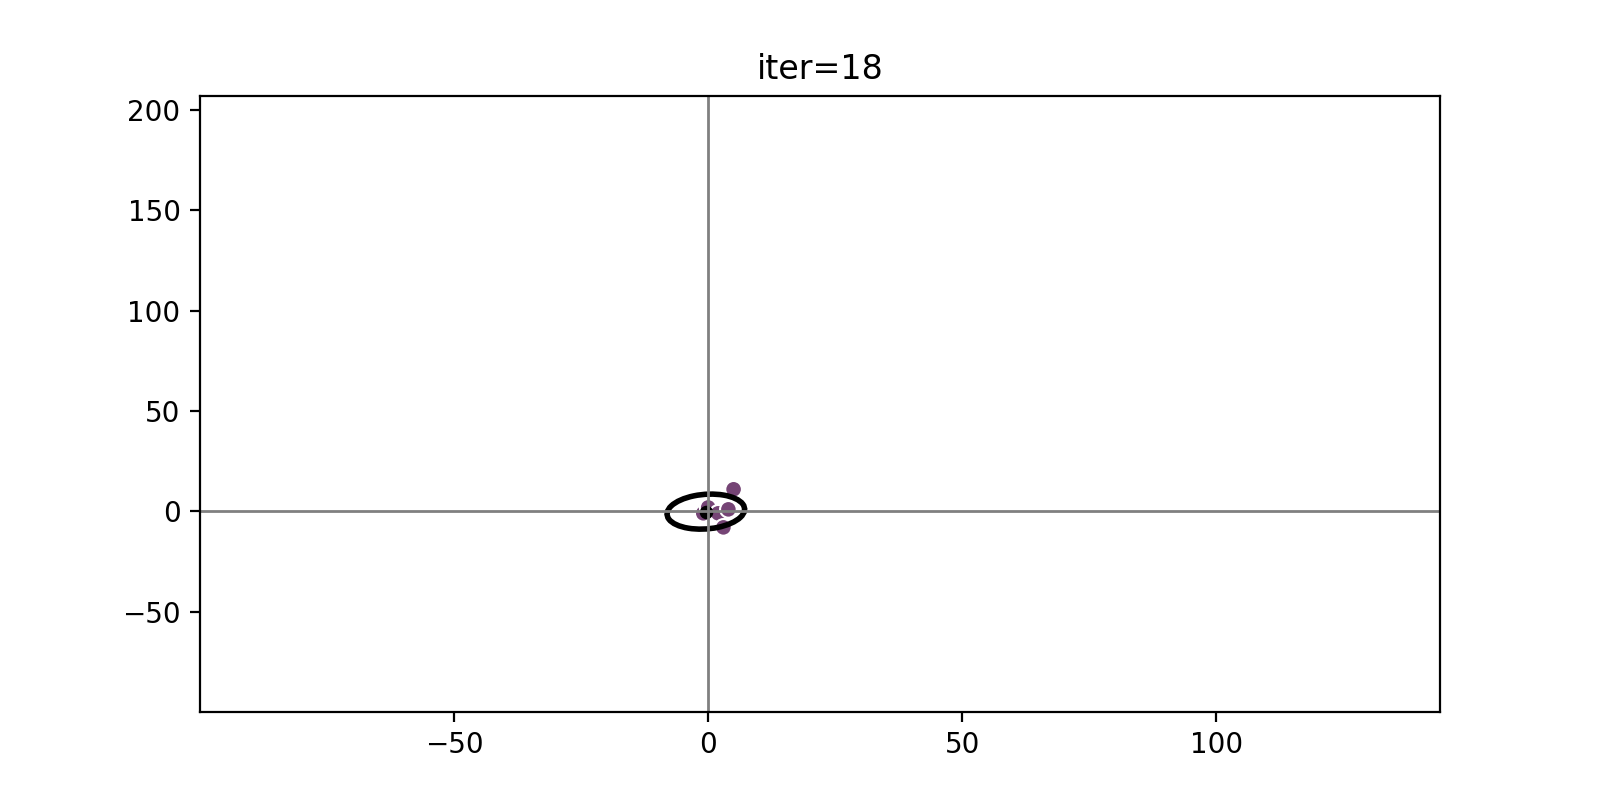

In [29]:
ana.animate_moving_cluster()

<IPython.core.display.Javascript object>


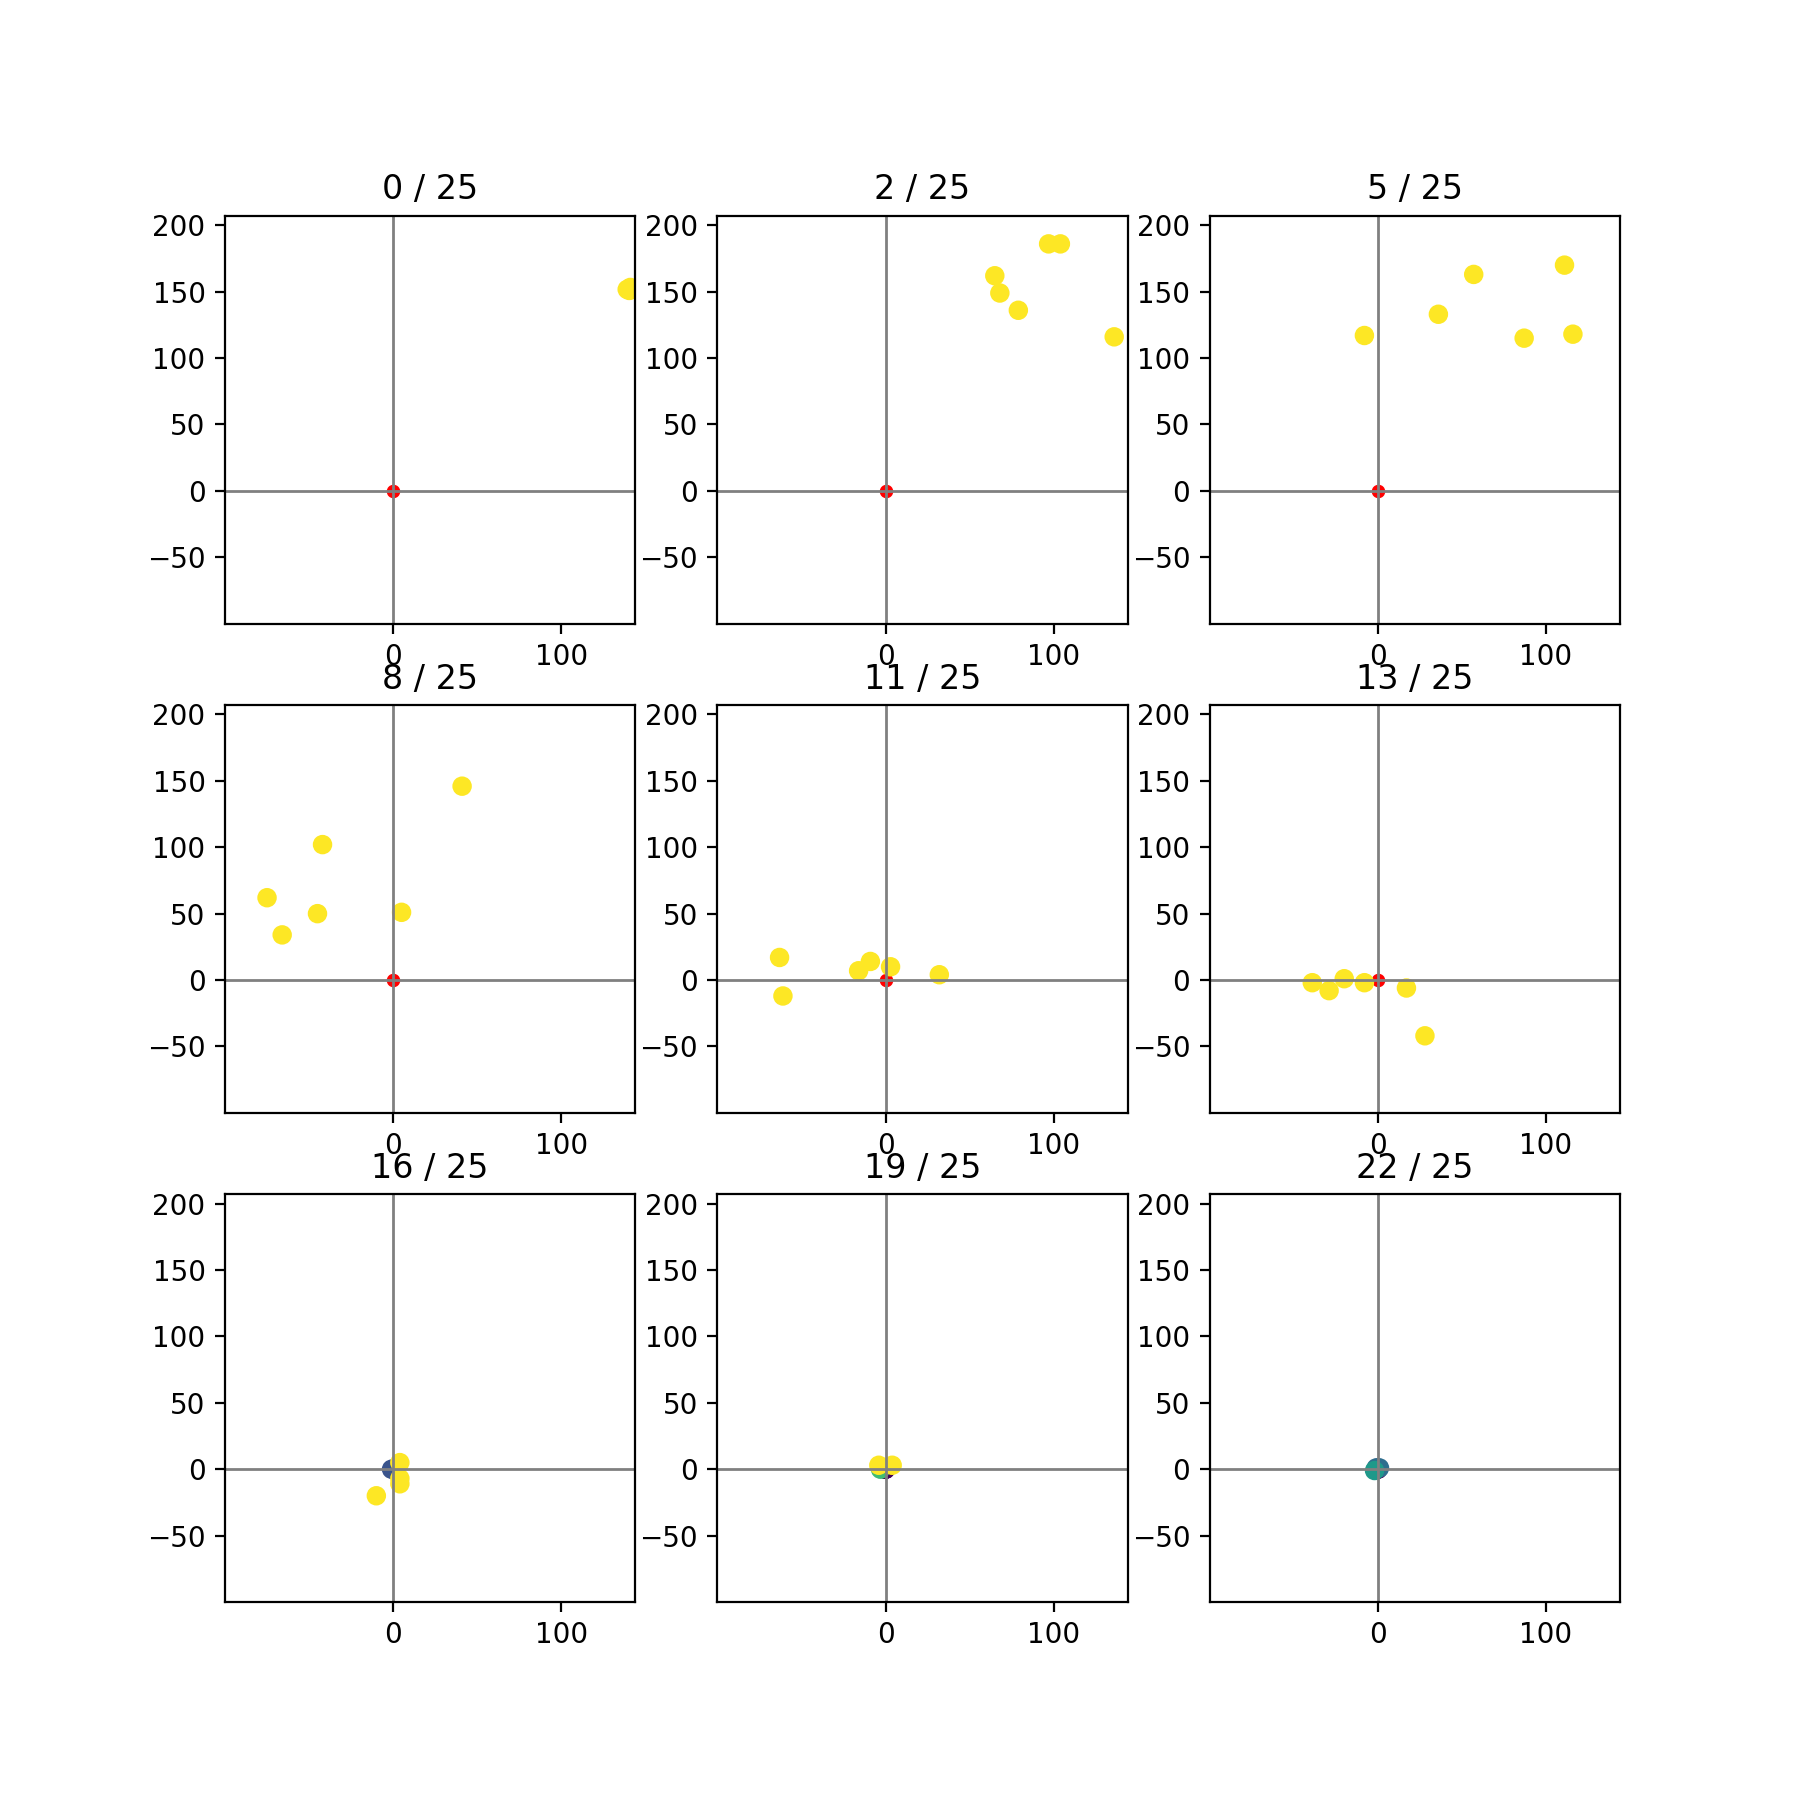

-99.9999747508106 143.99992028112888 -57.99998780542673 206.999984369146
-99.9999747508106 143.99992028112888 -57.99998780542673 206.999984369146
-99.9999747508106 143.99992028112888 -57.99998780542673 206.999984369146
-99.9999747508106 143.99992028112888 -57.99998780542673 206.999984369146
-99.9999747508106 143.99992028112888 -57.99998780542673 206.999984369146
-99.9999747508106 143.99992028112888 -57.99998780542673 206.999984369146
-99.9999747508106 143.99992028112888 -57.99998780542673 206.999984369146
-99.9999747508106 143.99992028112888 -57.99998780542673 206.999984369146
-99.9999747508106 143.99992028112888 -57.99998780542673 206.999984369146


In [30]:
ana.plot_moving_cluster()

<IPython.core.display.Javascript object>


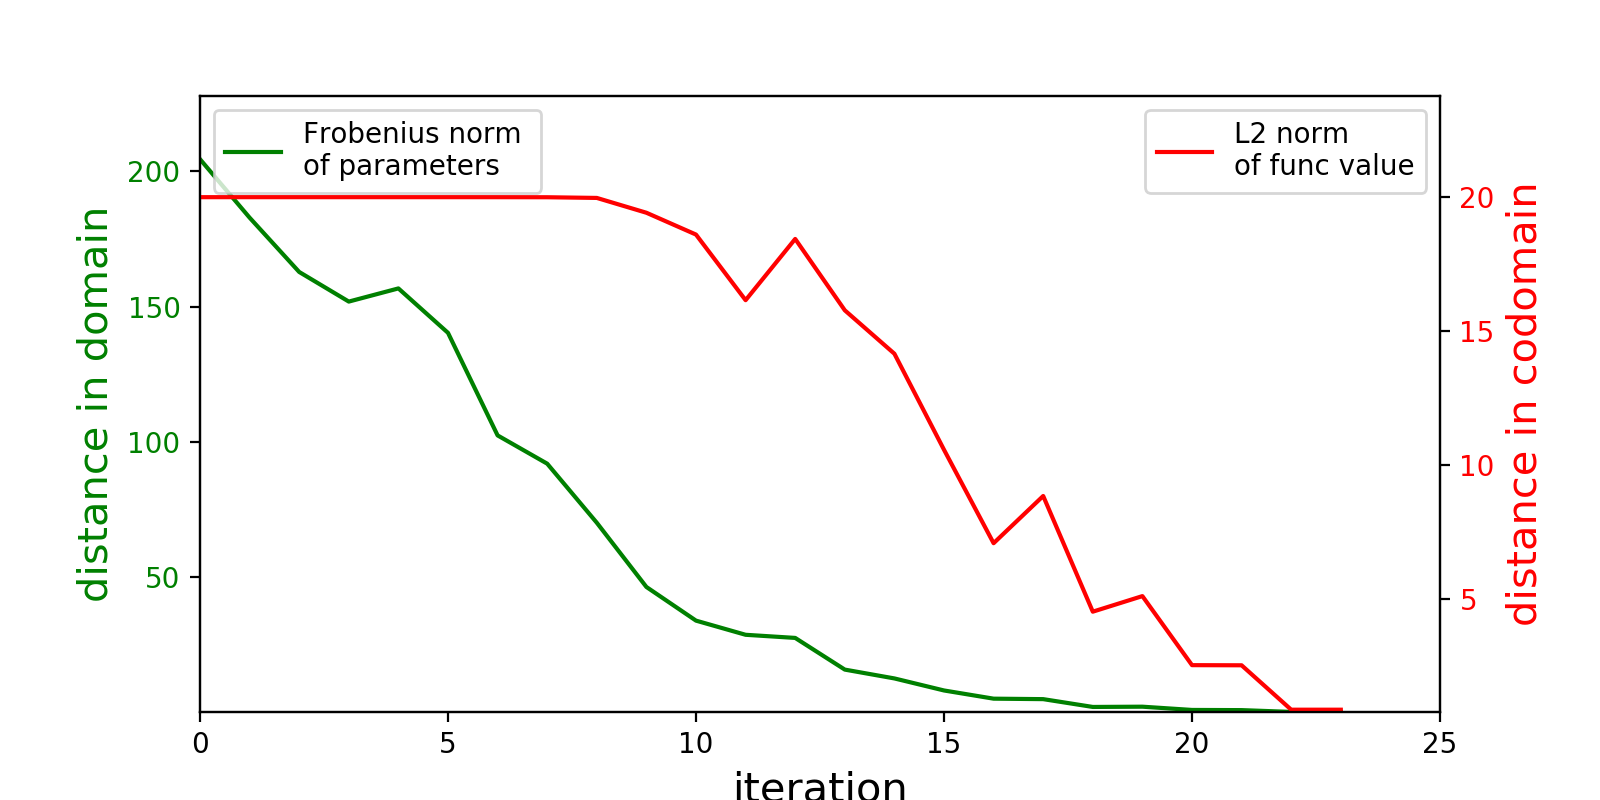

In [31]:
ana.plot_distance()

In [33]:
#ana.print_evaluations_per_iteration()

In [35]:
#ana.print_mean_variance()

In [37]:
#ana.print_points_before_and_after_adjust()